<h2 align="center">Employee leaving prediction</h2>
<h3 align="center">Using Logistic Regression</h3>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

**reading the dataset**

In [2]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
left = df[df.left==1]
left.shape

(3571, 10)

In [4]:
retained = df[df.left==0]
retained.shape

(11428, 10)

**To check the dependency of 'left' manually**

In [5]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Graph between 'salary' and 'left'**

<AxesSubplot:xlabel='salary'>

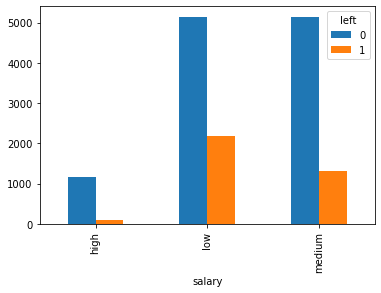

In [6]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

**Graph between 'Department' and 'left'**

<AxesSubplot:xlabel='Department'>

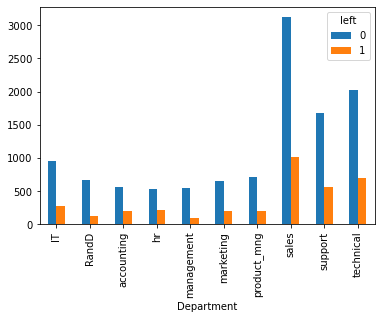

In [7]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

**Only selected columns will be in our dataframe**

In [8]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


**Making dummy columns for 'salary'**

In [9]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [10]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [11]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [12]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [13]:
X = df_with_dummies


In [14]:
y = df.left

**Splitting training and testing data**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

**Importing 'LogisticRegression' from sklearn.linear_model**

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [20]:
len(X_test)

10500

In [21]:
model.fit(X_train, y_train)

C:\Users\lakhan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
y_predicted = model.predict(X_test)

**Accuracy of the model**

In [23]:
model.score(X_test,y_test)

0.7728571428571429